# MECH 383 - Applied Electronics and Instrumentation
# Lab Information and Rules 

 
 
1. All labs are to be scheduled ahead of time, at the beginning of the semester, with the Chief Electronics Technician, Mario Iacobaccio, in person in MD51. 

2. Lab partners can be found by posting on the myCourses discussion board. 

3. All team members must be present for labs. Absences or time changes from scheduled labs need to be pre-arranged for valid reasons. 

4. It is strongly recommended to complete pre-labs before your experiment time. Pre-labs are handed in together with the experiment and lab report. 

5. Lab report due dates and late policy are given on the course syllabus. 

6. If your submission relies on additional files to run correctly, it is the responsibility of the student to ensure that all files are included with the submission and named correctly.

7. Labs are graded based on the output of each code block. Code that throws errors, supresses output, or otherwise results in **no printed output may not receieve points**.

7. Each lab will be handed in on behalf of the group by one group member.

**HINT**: To help ensure your notebook runs as expected, restart the kernel and re-run each cell sequentially.

In [8]:
import numpy as np
import math
import matplotlib
import math as m

The following wesites can be used as resources:

* https://www.python.org/
* https://numpy.org/
* https://matplotlib.org/


# MECH 383 - Lab 2

© Instructor-generated course materials (e.g., handouts, notes, summaries, exam questions, etc.) are protected by law and may not be copied or distributed in any form or in any medium without explicit permission of the instructor. 

##### Group Number:                
<br>Names:
<br>
<br> Collaborators:
<br>
<br> Grade:  ________________/105

# Experiment 2: Computing [Total: 30 points]

#### Part A - Derive Expressions

Consider the circuit below, where $R_{1}$ = 12kΩ, $R_{2}$ = 1.5kΩ, $R_{C}$ = 680Ω, $R_{E}$ = 22Ω, $R$ = 100Ω, $V_{CC}$ = 15V, $V_{T}$ = 0.025V, and $β$ ∈ [125,450].
<br>
<br>*Note: Not all BC107 npn BJTs will have the same β due to the limited consistency in the manufacturing process and other factors. Do not assume any value for β beforehand; rely on measured data to obtain the β value of the BJT you are using.*

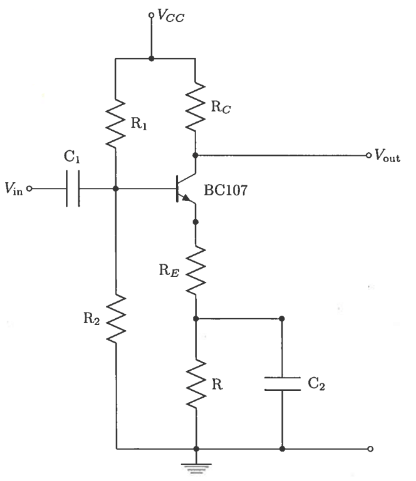

<center>Figure 1: Schematic

1. a) Draw the DC self-biased equivalent circuit of Figure 1, simplify the circuit using its Thevenin equivalent circuit, and derive the expression for DC currents $I_{B}$ and $I_{E}$ at the Q-point. Show your work by **defining a function** with the expression for $I_{B}$ and $I_{E}$. [5 points]
<br> Include a figure of your DC circuit below, as well as your derived expressions.
<br>
<br> b) If $\beta$ = 100, use your functions to find the numerical values of $I_{B}$ and $I_{E}$. [5 points]

In [218]:
"""
To obtain the DC self-biased equivalent circuit, we remove the capacitors, thereby creating a
self-biased circuit which sets a voltage V_B based on R_1 and R_2.
Then, taking the Thévenin equivalent voltage and resistance, we simplify the circuit further
to obtain a loop from which we can derive functions for both I_B and I_E.

We use the following equations to derive our functions:
    I_E = I_B + I_C
    I_C = beta * I_B

As with respect to node B and the ground, R_1 and R_2 are in parallel,
V_Th = R_2 / (R_1 + R_2) * V_CC, and
R_Th = R_1 // R_2 = (R_1 * R_2) / (R_1 + R_2)

Using KVL around the simplified loop,
V_Th - I_B * R_Th - V_BE - I_E * (R_E + R) = 0

Using I_E = (1 + beta) I_B,
V_Th - I_B * R_Th - V_BE - (1 + beta) * (R_E + R) * I_B = 0

Rearranging and substituing in values for V_Th and R_Th,
I_B = R_2 * V_CC - (R_1 + R_2) * V_BE) / (R_1 * R_2 + (1 + beta) * (R_E + R) * (R_1 + R_2)

And from our previous relation, we have,
I_E = (1 + beta) * I_B
"""

# Initializing variables
R_1 = 12e3
R_2 = 1.5e3
R_C = 680
R_E = 22
R = 100
V_CC = 15
V_BE = 0.7 # assumption is base-emitter voltage is ~0.7V

def I_B(beta):
    return (R_2 * V_CC - (R_1 + R_2) * V_BE) / (R_1 * R_2 + (1 + beta) * (R_E + R) * (R_1 + R_2))

def I_E(beta):
    return (1 + beta) * I_B(beta)

beta = 100
print("I_B = ", I_B(beta))
print("I_E = ", I_E(beta))

## Use print() to display your final answer

I_B =  7.079041156080652e-05
I_E =  0.007149831567641458


2. a) Draw the AC equivalent circuit of Figure 1, and derive the expression for the theoretical gain ($A_{v}$ = $V_{out}$/$V_{in}$) for this amplifier. β is unknown and you may keep $r_{e}$ as an independent variable during this derivation without deriving an expression of $r_{e}$ in terms of β. Show your work by **defining a function** with the expression for $A_{v}$.  [5 points]
<br>
<br>b) If $\beta$ = 100 and $r_{e}$ = 100Ω, use your functions to determine the numerical value of the gain $A_{v}$. [5 points] 

<img src="Lab2_Prelab_Q2.JPG" alt="Lab2_Prelab_Q2.JPG" width="500"/>

In [11]:
"""
---Finding v_out---
v_out = v_c
Ohm's law across R_C:
v_out = -i_c * R_C

---Finding v_in---
v_in = v_b
Ohm's law across R_E + r_e:
v_in = i_e * (R_E + r_e)
v_in = (i_b + i_c) * (R_E + r_e)
v_in = i_b(1+β) * (R_E + r_e)

---Finding A_v---
A_v = v_out/v_in
A_v = -R_C * β/(1+β)/(R_E + r_e)
"""

# Initialising variables
R_C = 680
R_E = 22
β_Q2 = 100
r_e_Q2 = 100

def ac_equivalent_gain(β, r_e):
    return -R_C * β / (1 + β) / (R_E + r_e)

AC_equiv_g = ac_equivalent_gain(β_Q2, r_e_Q2)

print(AC_equiv_g)

-5.518584645349781


3. a) Derive the expression for the input resistance $R_{in}$ and the output resistance $R_{out}$ for this amplifier. Show your work by **defining a function** with the expression for $R_{in}$ and $R_{out}$. β is unknown and you may keep $r_{e}$ as an independent variable during this derivation without deriving an expression of $r_{e}$ in terms of β. [5 points]
<br>
<br>b) If $\beta$ = 100 and $r_{e}$ = 100Ω, use your functions to determine the numerical value of the gain $A_{v}$. Is this the same gain as calculated with the AC equivalent model? [5 points] 

<img src="EquivalentCircuitQ3.PNG" alt="EquivalentCircuitQ3.PNG" width="500"/>

In [14]:
## Display your functions and calculations here


# a)

'''
The input impedance represents the equivalent impedance from the base to the emitter, since the V_in 
is attached to the base and is grounded after the emitter. To determine the equivalent resistance of 
the circuit, we can short the direct current input V_cc. This brings the 15V potential down to zero, 
and we can rearrange the circuit as above. Furthermore, since we are dealing with alternating current 
sources, the capacitors can be shorted at sufficiently high frequencies.

Both R1 and R2 are parallel in the model; however, RE and re need to be modified. The voltage drop
across the emitter branch shows that V_in = I_E*(RE + re). We know that I_E = (β + 1)*I_B, and thus
V_in = I_B * [(β + 1)*(RE + re)]. Since the actual current supplied, or "seen" by the input voltage
is the base voltage, this represents the equivalent resistance of the emitter branch as seen by the
input. Thus,

Z_in = R1 // R2 // (β + 1)*(RE + re)

'''

def input_resistance(R1, R2, RE, beta, re):
    return 1/(1/R1 + 1/R2 + 1/((beta + 1) * (re + RE)))

'''
The output voltage is measured from the collector terminal to the emitter terminal. There is a difference
in the equivalent impedance of the emitter branches, since I_C = β*I_B. Using the same logic from the previous
derivation,

Z_out = RC // β*(RE + re)
'''

def output_resistance(RC, beta, RE, re):
    return 1/(1/RC + 1/(beta*(re + RE)))

# b)

RC = 680
RE = 22
R1 = 1.2e4
R2 = 1.5e3
R = 100
beta = 100
r_e = 100

'''
The voltage gain is the ratio between the output and input voltages. This ratio can be manipulated to represent
the impedances as well. 

A_v = V_out / V_in ==> A_v = V_C / V_B ==> A_v = 
'''
Z_in = input_resistance(R1, R2, RE, beta, r_e)
Z_out = output_resistance(RC,beta,RE,r_e)
A_v = -Z_out/(r_e + RE)
diff_percent = 200*abs(A_v - AC_equiv_g)/abs(A_v + AC_equiv_g)

print("The input impedance of the amplifier is " + str(Z_in) + ', and the output impedance is ' + str(Z_out) + '.')
print("The gain of the amplifier is " + str(A_v) + ', a difference of ' + str(round(diff_percent,2)) + '%' + ' from the AC equivalent model')



The input impedance of the amplifier is 1203.1440706927697, and the output impedance is 644.0993788819875.
The gain of the amplifier is -5.279503105590061, a difference of 4.43% from the AC equivalent model


# Experiment 2: Common Emitter Amplifier [Total: 35 points]

1. Locate the power supply unit and supply 15V ($V_{CC}$) and Ground to the workbench. Connect the "+15V" and "COM" pins from the power supply to the "+15V" and "0V" pins on the workbench as shown in Fig. 2. Turn/leave the power supply OFF.

2. Measure the value of each resistor using the multimeter set to "Ω" mode. Record and print your measurements below. [5 points]

In [17]:
R_1 = 11.89e3
R_2 = 1.487e3
R_C = 686.6
R_E = 22.44
R = 103.2

print('R1 =', R_1, 'Ω')
print('R2 =', R_2, 'Ω')
print('RC =', R_C, 'Ω')
print('RE =', R_E, 'Ω')
print('R =', R, 'Ω')

R1 = 11890.0 Ω
R2 = 1487.0 Ω
RC = 686.6 Ω
RE = 22.44 Ω
R = 103.2 Ω


3. With the power supply OFF, assemble the circuit shown in Fig. 1 for $R_{1}$ = 12kΩ, $R_{2}$ = 1.5kΩ, $R_{C}$ = 680Ω, $R_{E}$ = 22Ω, $R$ = 100Ω, $C_{1}$ = 2.2µF, and $C_{2}$ = 100µF. A hook-up diagram is shown in Fig. 2.

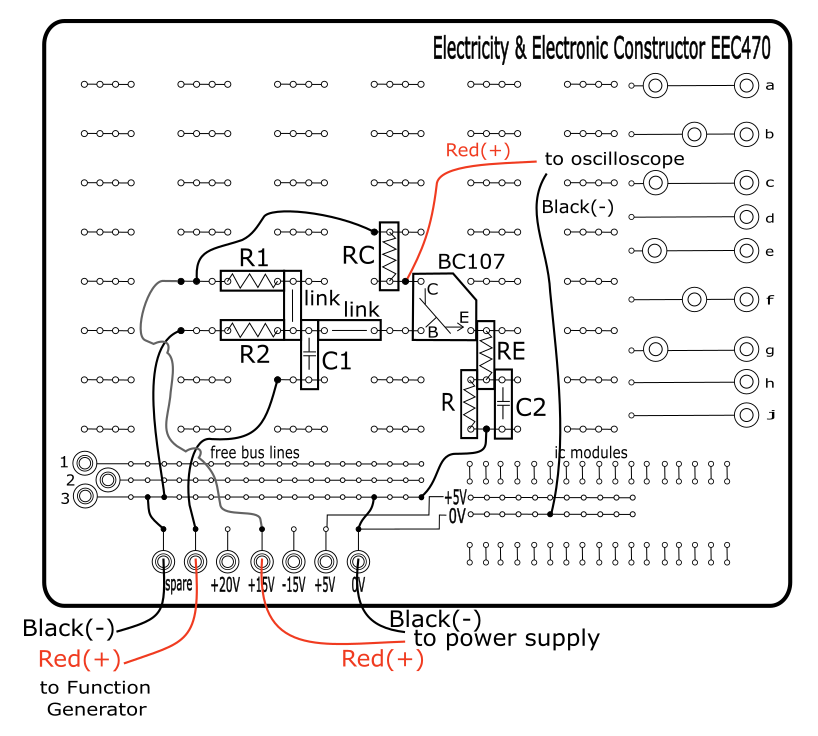

<center>Figure 2: Hook-up diagram

4. Please first disconnect the input wire to the input capacitor from spare terminal, then turn the power supply on. Measure the $V_{B}$, $V_{E}$, $V_{C}$, and $V_{CC}$ DC values using the multieter set to "VDC" mode. Turn the power supply OFF once measurement is done and plug the input wire back in. Record and print your measurements below. [10 points]
<br>*Hint: The voltage points $V_{B}$, $V_{E}$, and $V_{C}$ are the terminals of the BJT relative to ground. $V_{CC}$ is the voltage supply.*

In [9]:
V_B = 1.661
V_E = 1.006
V_C = 10.22
V_CC = 14.95

print('V_B =', V_B, 'V')
print('V_E =', V_E, 'V')
print('V_C =', V_C, 'V')
print('V_CC =', V_CC, 'V')

V_B = 1.661 V
V_E = 1.006 V
V_C = 10.22 V
V_CC = 14.95 V


5. Plug the base of the T-shaped BNC plug into the output of the function generator.

6. Using a BNC-BNC cable, connect one branch of the T-shaped plug to channel 1 input of the oscilloscope. Turn the oscilloscope on.

7. Set a 1kHz sinusoidal wave with a peak-to-peak value of 400mV on the function generator. Use the oscilloscope to measure and set the frequency and peak-to-peak voltage of the function generator.
<br>NOTE: *It is best practice to adjust the observed curve so that its DC biad is at the center of the oscilloscope screen with respect to the Y-axis. Once centered, adjust the scale (division) of the display so that the curve takes the maximum amount of space on the screen without clipping. This is to ensure the reading of the peak-to-peak value is as precise as possible. Please set the software coupling switches on the menu of the TDS 2002 oscilloscope to "AC Coupling" for both channels.*

8. Connect the BNC end of the BNC-Banana cable to the other free branch of the T-shaped plug. Connect the banana cables to the "Spare" terminals on the workboard.

9. Connect the BNC end of the BNC-Alligator cable to the Channel 2 of the oscilloscope then connect the alligator clips to the frayed wires on the output of the circuit.

10. Turn on the power supply and measure the input and output peak-to-peak voltages using the oscilloscope. Record and print your measurements. [10 points]

In [16]:
v_in = 0.400
v_out = 9.60

print('V_in =', v_in, 'V')
print('V_out =', v_out, 'V')

V_in = 0.4 V
V_out = 9.6 V


11. Take a picture of the input and output curves from the oscilloscope. Include your image below and describe the result. What is the form of the curves? Maxima and minima? Are they synchronized or offest (and if so, by how much)? [10 points]

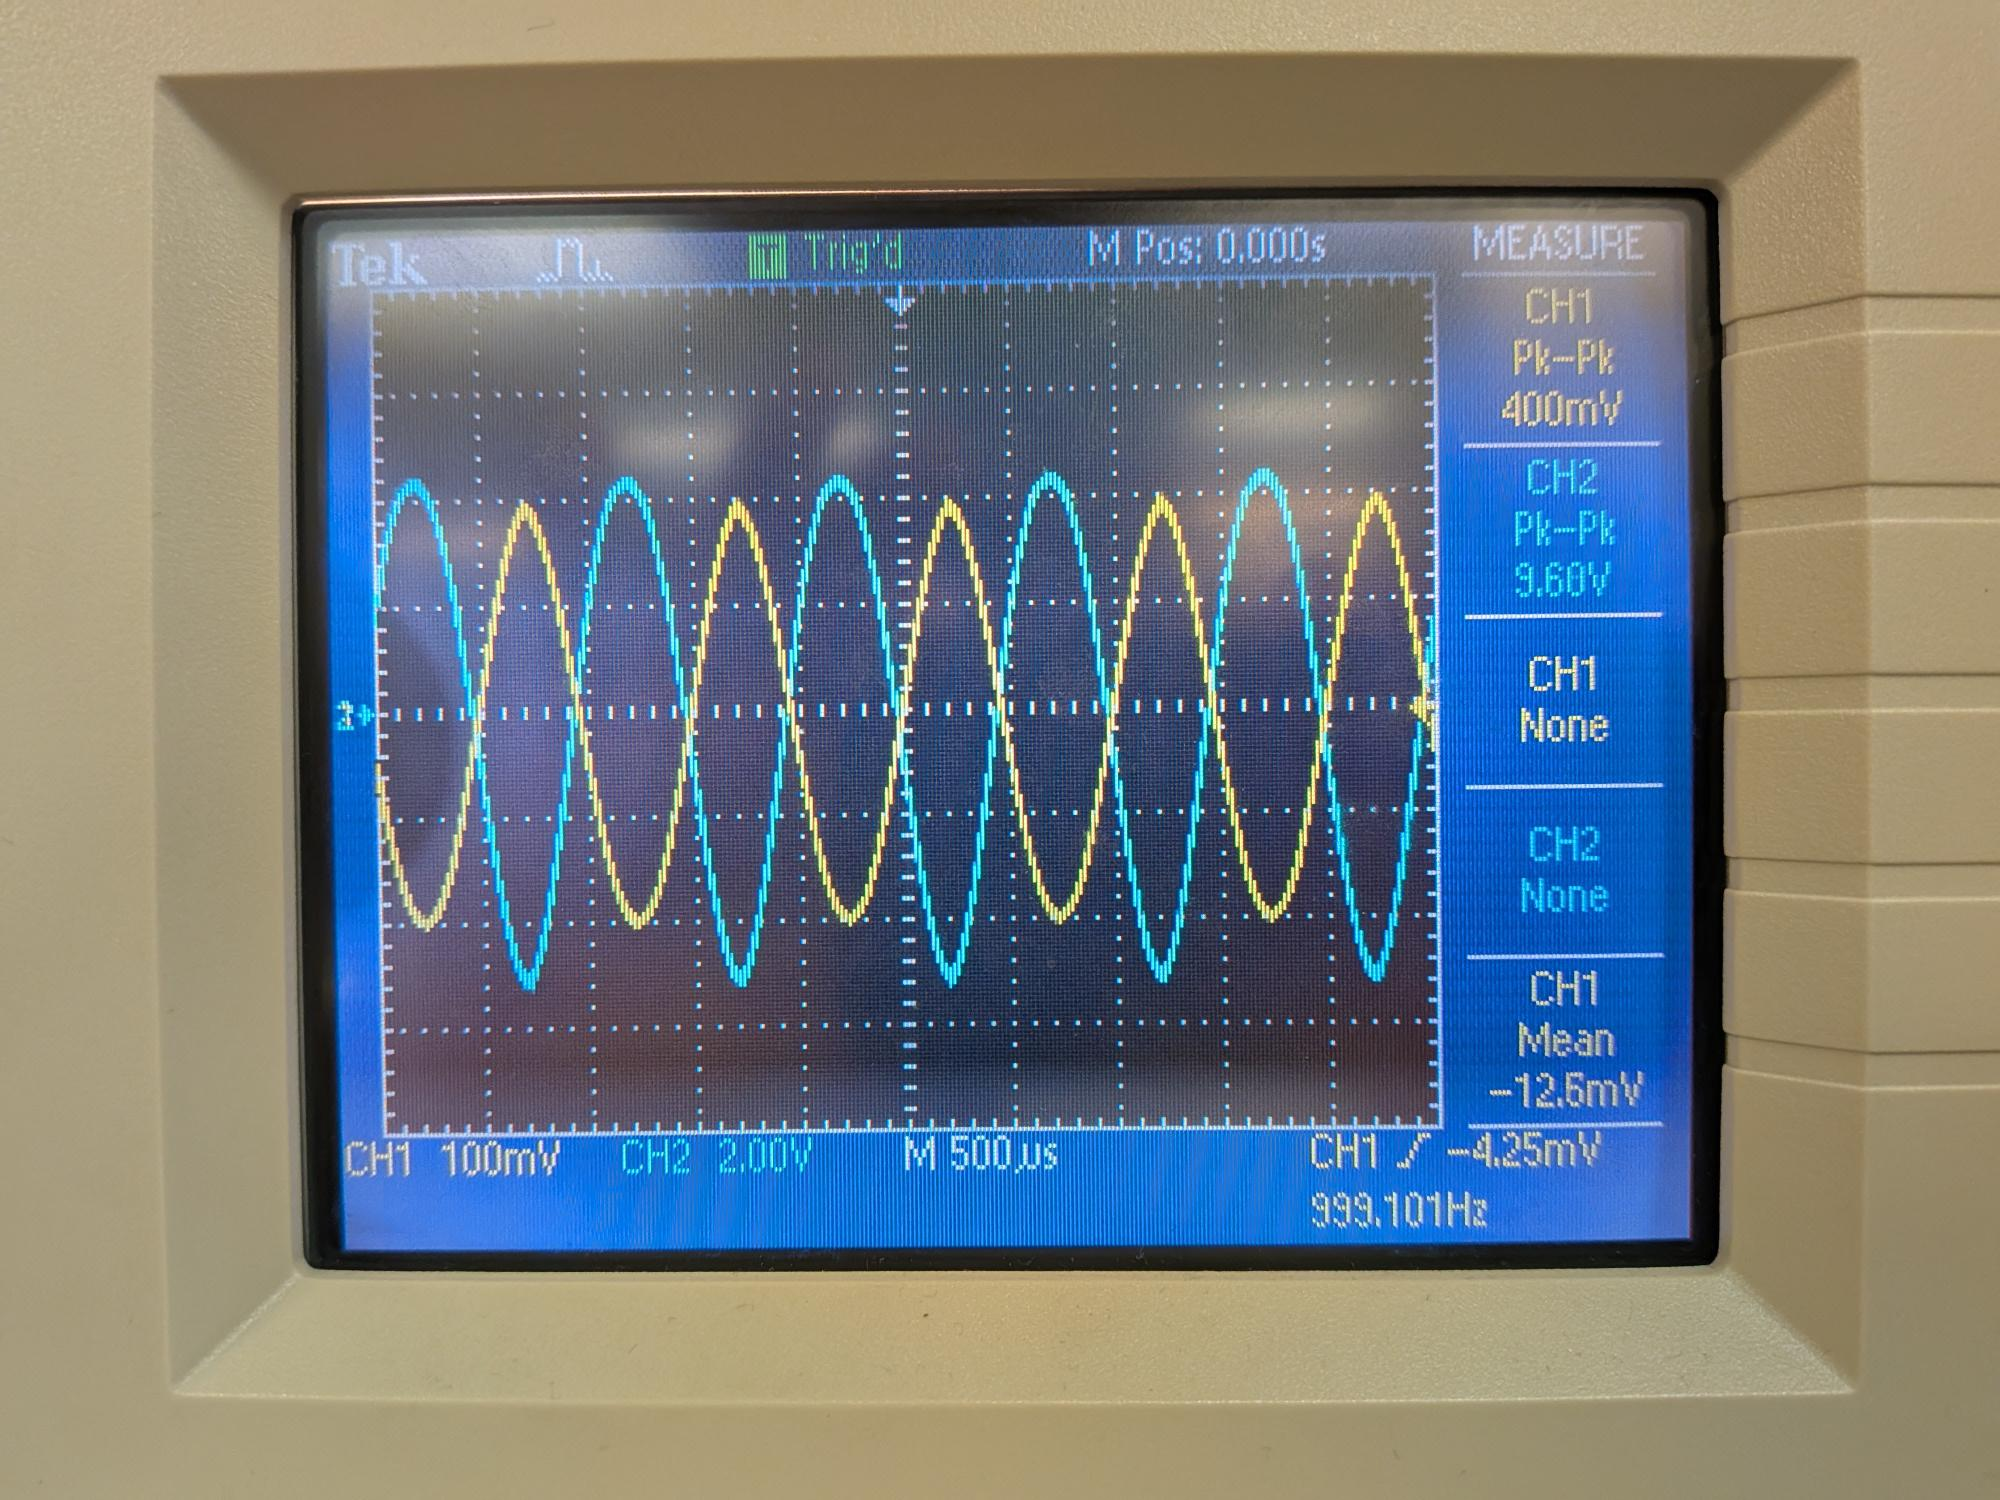

The peaks are quantized to fit within the frame without scaling issues: the peak to peak voltages read 0.4 V and 9.6 V for the input and output voltage drops, respectively. They are both sinusoids offset from each other by 180 degrees, or half a period.

# Experiment 2: Lab Report [35 points]

1. Record and print the following values: $R_{1}$, $R_{2}$, $v_{in}$, $v_{out}$, $V_{B}$, $V_{E}$, $V_{C}$, $V_{CC}$, $V_{BE}$, $V_{BC}$, and $V_{CE}$. [5 points]

In [224]:
# Printing already known data

print('R1 =', R_1, 'Ω')
print('R2 =', R_2, 'Ω')
print('V_in =', v_in, 'V')
print('V_out =', v_out, 'V')
print('V_B =', V_B, 'V')
print('V_E =', V_E, 'V')
print('V_C =', V_C, 'V')
print('V_CC =', V_CC, 'V')

# Calculating voltage differences

V_BE = V_B - V_E
V_BC = V_B - V_C
V_CE = V_C - V_E

print('V_BE =', V_BE, 'V')
print('V_BC =', V_BC, 'V')
print('V_CE =', V_CE, 'V')

R1 = 11.89 Ω
R2 = 1.487 Ω
V_in = 0.4 V
V_out = 9.6 V
V_B = 1.661 V
V_E = 1.006 V
V_C = 10.22 V
V_CC = 14.95 V
V_BE = 0.655 V
V_BC = -8.559000000000001 V
V_CE = 9.214 V


2. From the above values determine $I_{B}$, $I_{E}$, and $I_{C}$. [6 points]

In [225]:
i_c = v_out/R_C

3. What is β? [5 points]

In [226]:
## Display your calculations here
## Use print() to display your final answer

4. Calculate $Z_{in}$ and $Z_{out}$ at the signal frequency (1kHz). Use your engineering judgement to make simplifying assumptions with respect to dominant values. [7 points]
<br>*Hint: For imaginary numbers, display the real and imaginary parts as separate variables, or use numpy.imag: https://numpy.org/doc/stable/reference/generated/numpy.imag.html*

In [ ]:
## Display your calculations here

'''
From the logic used in the third prelab question, we know that the equivalent impedances are
influenced by the value of beta. Since the impedance of resistors is simply their resistance,
the only added impedance is the capacitor reactance:

Z_C = 1/jωC

Of course, at high enough frequency, this value becomes relatively small.
In the scope of this circuit, it will be preserved since it is non-negligible.
'''

ZR1 = R_1
ZR2 = R_2
ZRE_in = (beta+1)*R_E
ZRE_out = beta*R_E
ZRC = R_C
ZR_in = (beta+1)*R
ZR_out = beta*R
ZC1 = -1j/(1000*2*np.pi*2.2e-6)
ZC2_in = (beta+1)*-1j/(1000*2*np.pi*100e-6)
ZC2_out = beta*-1j/(1000*2*np.pi*100e-6)

ZE_in = ZRE_in + 1/(1/ZR_in + 1/ZC2_in)
ZE_out = ZRE_out + 1/(1/ZR_out + 1/ZC2_out)

Z_in = ZC1 + 1/(1/ZR1 + 1/ZR2 + 1/ZE_in)
Z_out = 1/(1/ZRC + 1/ZE_out)

## Use print() to display your final answer
print('The input impedance of the circuit is ' + str(Z_in) + ', and the output impedance is ' + str(Z_out) + '.')

The input impedance of the circuit is (836.1588148285347-94.07506516821559j), and the output impedance is (526.3451092532333-8.693769078158187j).


5. What are the actual and theoretical AC voltage gains? What is the % difference? Why is there a difference (if any)? [5 points]

In [24]:
## Display your calculations here

# Actual voltage gain:

A_v_actual = -v_out/v_in
A_v_theory = A_v

diff_percent = 2*abs(A_v_actual-A_v_theory)/abs(A_v_actual+A_v_theory)*100

## Use print() to display your final answer

'''
The reason for such a large discrepancy between predicted values and the actual
measurements is perhaps a result of faulty equipment. During our experiment, the 
power supply experienced a failure in one of the lead wires, where the wire frayed
enough to separate and cause incorrect readings. Due to the age of the supply, 
there could be other issues with the device.

Another reason for the difference could be due to discrepancies in internal 
resistances for the power supply, the oscilloscope equipment, and the transistor.
These could have influenced the input and output impedances, and thus the gain 
of the amplifier.
'''

print('The measured AC voltage gain of the circuit is ' + str(round(A_v_actual,3)) + ', while the calculated gain was ' + str(A_v_theory) + '.\nThe percent difference between the two is ' + str(round(diff_percent,2)) + '%.')

The measured AC voltage gain of the circuit is -24.0, while the calculated gain was -5.279503105590061.
The percent difference between the two is 127.87%.


6. Is there any phase shift between input and output? If yes, how much? [2 points]

Yes, there is a 180 degree phase shift in the signal. This is evidenced by the inverting gain, which ensures that the output and input peaks are opposite at the same timestamp.

7. How do variations in biasing affect the common emitter amplifier output? [5 points]

The biasing of the voltage allows the base and the collector to share a common DC voltage source. In order for the transistor to be in the active mode, the voltage drop from the base to the collector must be less than 0.4 V. This biasing allows the control of this voltage drop, which removes the need for two unique voltage sources to actually obtain an output.

As seen from previous calculations, the biasing resistors affect the input impedance, which in turn affects the gain. This means that the magnitude of resistance in each resistor can directly influence the amplification of the signal. However, the bias of the input voltage must be balanced. If the resistances are too high, a lot more power will be dissipated from the resistors, which will reduce the overall efficiency of the amplifier. If the resistances are too low, the signal could be clipped by reaching the maximal DC current in the circuit, and other distortions may arise that change the signal waveform.

## References [5 points]

Please share any resources that you used (ex: Stack Overflow, official documentation, myCourses forum, etc) and the names of anyone you worked with. For resources, provide a URL where necessary. For collaborators, note which sections were done collaboratively; failure to do so may result in a grade of 0/5 for references.

A. Sedal. (2024). Lecture 11 - Transistors (Part 1) [PowerPoint slides]. Available: https://mycourses2.mcgill.ca/d2l/le/lessons/803808/topics/8720490

"Bipolar Junction Transistors (DC Analysis)." CircuitBread. Oct. 5, 2025. [Online]. Available: https://www.circuitbread.com/equations/bipolar-junction-transistors-dc-analysis

G. Rizzoni, "Bipolar Junction Transistors: Operation, Circuit Models, and Applications" in Fundamentals of Electrical Engineering. D. M. Schueller, 1st ed. New York, NY, USA: McGraw-Hill, 2009, ch. 10.

J. Fiore. "Chapter 16. Common Emitter Amplifier." Atlantic OER. Oct. 20, 2025. [Online]. Available: https://pressbooks.atlanticoer-relatlantique.ca/semiconductorlab/chapter/common-emitter-amplifier/

Vince. "Amplifier Bias Explained." Ham Shack Reviews. Oct. 20, 2025. [Online]. Available: https://hamshackreviews.com/amplifier-bias/

W. Storr. "Input Impedance of an Amplifier." Electronics Tutorials. Oct. 6, 2025. [Online]. Available: https://www.electronics-tutorials.ws/amplifier/input-impedance-of-an-amplifier.html